<a href="https://www.kaggle.com/code/jaikrishna612/brain-mri-cnn?scriptVersionId=118451431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense

In [2]:
os.listdir()

['.virtual_documents', '__notebook_source__.ipynb']

In [3]:
os.listdir("/kaggle/input/brain-mri-images-for-brain-tumor-detection")

['no', 'yes', 'brain_tumor_dataset']

In [66]:
classes = ['no','yes']
def cs_images(path,classes):
    imag = []
    label = []
    for i in classes:
        l1 = os.listdir(path+'/'+i)
        for j in l1:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size = (50,50)).convert("RGB")
#             img = img.reshape(img.shape[0],img.shape[1],1)
            imag.append(np.array(img))
            label.append(classes.index(i))
            del(img)
    %matplotlib inline 
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(6,4,i+1)
        plt.imshow(imag[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imag),label

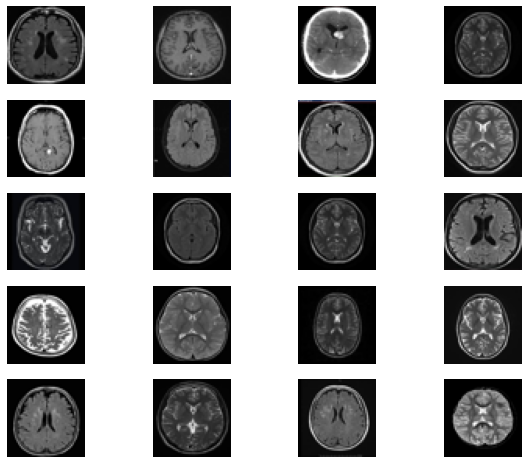

In [68]:
x,y = cs_images('/kaggle/input/brain-mri-images-for-brain-tumor-detection/',classes)

In [69]:
x.shape

(253, 50, 50, 3)

In [70]:
len(y)

253

In [71]:
x

array([[[[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  3,   3,   3],
         [  4,   4,   4],
         [  4,   4,   4]],

        [[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  3,   3,   3],
         [  5,   5,   5],
         [  5,   5,   5]],

        [[  5,   5,   5],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  4,   4,   4],
         [  5,   5,   5],
         [  4,   4,   4]],

        ...,

        [[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],

        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],

        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  3,   3,   3],
        

In [72]:
y[0:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [73]:
y[245:253]

[1, 1, 1, 1, 1, 1, 1, 1]

In [74]:
y[90:110]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [75]:
#s = pd.Series(y,dtype="category")
s = pd.Series(y)

In [76]:
s

0      0
1      0
2      0
3      0
4      0
      ..
248    1
249    1
250    1
251    1
252    1
Length: 253, dtype: int64

In [77]:
s.value_counts()

1    155
0     98
dtype: int64

In [78]:
s.unique()

array([0, 1])

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,s,test_size = 0.1,random_state = 1,shuffle = True)

In [80]:
x_train.shape

(227, 50, 50, 3)

In [81]:
x_test.shape

(26, 50, 50, 3)

In [82]:
len(y_train)

227

In [83]:
len(y_test)

26

**CNN MODEL CLASSIFICATION**

In [84]:
from tensorflow.keras.layers import Dropout,BatchNormalization,AveragePooling2D

In [85]:
# from tensorflow.keras.layers import MaxPool2D
# model = Sequential()
# #cnn
# """ConvLayer_1"""
# model.add(Conv2D(6,activation = "tanh",kernel_size=5,input_shape = x_train.shape[1:],padding = "same",strides = 1))
# #model.add(BatchNormalization())
# model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
# """ConvLayer_2"""
# model.add(Conv2D(16,activation = "tanh",kernel_size=5,strides = 2,padding = "valid"))
# #model.add(BatchNormalization())
# model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
# """ConvLayer_3"""
# model.add(Conv2D(120,activation = "tanh",kernel_size=5,strides = 1,padding = "valid"))
# # model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
# """ConvLayer_4"""
# # model.add(Conv2D(256,activation = "relu",kernel_size=3))
# # #model.add(MaxPool2D(2,2))
# model.add(Flatten())
# model.add(Dense(84,activation = "tanh"))
# model.add(Dense(2,activation = "softmax"))

In [86]:
from tensorflow.keras.layers import MaxPool2D
model = Sequential()
model.add(Conv2D(16,activation = 'relu',kernel_size = 3,input_shape = x_train.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,activation = 'relu',kernel_size = 3))
model.add(MaxPool2D(2,2))
model.add(Dense(500,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))

In [87]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dense_10 (Dense)             (None, 11, 11, 500)       16500     
_________________________________________________________________
dense_11 (Dense)             (None, 11, 11, 2)         1002      
Total params: 22,590
Trainable params: 22,590
Non-trainable params: 0
__________________________________________________

**compilation**

In [88]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [90]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10


2023-02-07 09:16:50.903291: W tensorflow/core/framework/op_kernel.cc:1680] Invalid argument: required broadcastable shapes


InvalidArgumentError:  required broadcastable shapes
	 [[node Equal (defined at tmp/ipykernel_24/74395783.py:1) ]] [Op:__inference_train_function_4400]

Function call stack:
train_function


In [ ]:
y_pred = np.argmax(model.predict(x_test),axis=1)

In [ ]:
y_pred[0:5]

In [ ]:
y_test[0:5]

In [ ]:
_,acc = model.evaluate(x_test,y_pred)
acc*100


In [ ]:
_,acc = model.evaluate(x_test,y_test)
acc*100

In [ ]:
print(_)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)